In [1]:
import numpy as np
from numpy import linalg as LA
import math
import matplotlib.pyplot as plt
from matplotlib import animation
import mpl_toolkits.mplot3d.axes3d as Axes3D

In [2]:
# Dobija vektor kao ulaz a vraca jedinicni vektor u
def normalizacija(u):
    norma = 0
    for x in u:
        norma += x ** 2
    
    norma = math.sqrt(norma)
    
    return u / norma

In [3]:
# Funkcija vraca kvaternion na osnovu ose p i ugla phi
def AxisAngle2Q(p, phi):
    w = math.cos(phi / 2)
    
    p = normalizacija(p)
    
    [x, y, z] = math.sin(phi / 2) * p
    
    return np.array([x, y, z, w])

In [4]:
#Predstaviti A kao rotaciju oko prave p za ugao phi
# A mora da je ortogonalna i razlicita od E i da je detA = 1
# Izlaz jedinicni vektor p i ugao phi koji pripada [0, pi]
# (A - E) * p = 0
def AxisAngle(A):
    if round(LA.det(A)) != 1:
        print("Determinanta je razlicita od 1")
        return

    if np.any(np.round(A.dot(A.T),6) != np.eye(3)):
        print("Matrica A nije ortogonalna")
        return
    
    A_E = A - np.eye(3)
    first = A_E[0]
    second = A_E[1]
    p = np.cross(first, second)
    p = normalizacija(p)
    
    # Vektor u je normalan na vektor p
    u = normalizacija(first)
    
    u_p = A.dot(u)
    u_p = normalizacija(u_p)
    
    # Vektori u i u_p su jedinci pa ne mora da se deli sa proizvodom njihovih normi
    phi = math.acos(u.dot(u_p))
    
    mesoviti_proizvod = LA.det(np.array([u, u_p, p]))
    
    if mesoviti_proizvod < 0:
        p = -p
        phi = 2 * math.pi - phi
        
    return (p, phi)

In [5]:
# Dobijamo matricu kretanja A
def Euler2A(phi, theta, psi):
    # A = Rz(psi) * Ry(theta) * Rx(phi)
    
    Rz = np.array([
        [math.cos(psi), -math.sin(psi), 0],
        [math.sin(psi), math.cos(psi), 0],
        [0, 0, 1]
    ])
    
    Ry = np.array([
        [math.cos(theta), 0, math.sin(theta)],
        [0, 1, 0],
        [-math.sin(theta), 0, math.cos(theta)]
    ])
    
    Rx = np.array([
        [1, 0, 0],
        [0, math.cos(phi), -math.sin(phi)],
        [0, math.sin(phi), math.cos(phi)]
    ])
    
    return Rz.dot(Ry).dot(Rx)

In [6]:
def lerp(q1, q2, tm, t):
    q = (1 - (t / tm)) * q1 + (t / tm) * q2
    return q

In [7]:
# Vraca jedinicni kvaternion koji zadaje orijentaciju u trenutku t
def slerp(q1, q2, tm, t):
    cos0 = np.dot(q1, q2)

    if cos0 < 0:
        q1 = -q1
        cos0 = -cos0
        
    if cos0 > 0.95:
        return lerp(q1, q2, tm, t)
    
    phi0 = math.acos(cos0)
    
    a = math.sin(phi0 * (1 - t / tm)) / math.sin(phi0)
    b = math.sin(phi0 * t / tm) / math.sin(phi0)
    print(a, b)
    q_t = a * q1 + b * q2
    return q_t

In [8]:
# Mnozenje kvaterniona
def qmul(q1, q2):
    v1 = q1[0:3]
    w1 = q1[3]
    v2 = q2[0:3]
    w2 = q2[3]
    v = np.cross(v1, v2) + w2 * v1 + w1 * v2
    w = w1 * w2 - np.dot(v1, v2)
    return np.array([v[0], v[1], v[2], w])

# Inverza kvaterniona
def qinv(q):
    return [-q[0], -q[1], -q[2], q[3]] / (np.linalg.norm(q) ** 2)

In [9]:
# p' = qpq
def transform(p, q):
    qi = qinv(q)

    x = qmul(qmul(q, np.array([1, 0, 0, 0])), qi)
    x = np.array([[p[i], p[i] + x[i]] for i in range(3)])
    
    y = qmul(qmul(q, np.array([0, 1, 0, 0])), qi)
    y = np.array([[p[i], p[i] + y[i]] for i in range(3)])
    
    z = qmul(qmul(q, np.array([0, 0, 1, 0])), qi)
    z = np.array([[p[i], p[i] + z[i]] for i in range(3)])
    
    return (x, y, z)

In [10]:
def animate(frame):
    p = lerp(p1, p2, tm, frame)
    q = slerp(q1, q2, tm, frame)
    r = apply_transform(p, q)
    for i in range(len(axis_current)):
        axis_current[i].set_data(r[i][0], r[i][1])
        axis_current[i].set_3d_properties(r[i][2])

    fig.canvas.draw()

1.0 0.0
1.0 0.0
0.9938860427528426 0.022565901063768837
0.9873002460880856 0.04512108914721847
0.9802457365598095 0.06765485635593108
0.9727258632397632 0.0901565049648771
0.9647441961274184 0.11261535249707429
0.9563045244551418 0.1350207367950079
0.9474108548892864 0.15736202108240427
0.9380674096280606 0.1796285990139551
0.9282786243970705 0.20180989971059451
0.9180491463434985 0.22389539277793913
0.9073838318299043 0.24587459330550834
0.8962877441287082 0.26773706684435095
0.8847661510184407 0.2894724343607166
0.8728245222829097 0.3110703771634183
0.8604685271144625 0.3325206418025483
0.8477040314225832 0.353813044937221
0.8345370950490985 0.37493747817003253
0.8209739688913174 0.39588391284594115
0.8070210919344676 0.4166424048132903
0.7926850881948387 0.4372030991447154
0.7779727635750835 0.45755623481569097
0.7628911026331711 0.4776921493384989
0.7474472652665236 0.49760128334941683
0.731648583312912 0.5172741851469491
0.7155025570697259 0.5367015151789469
0.699016851733267 0.55

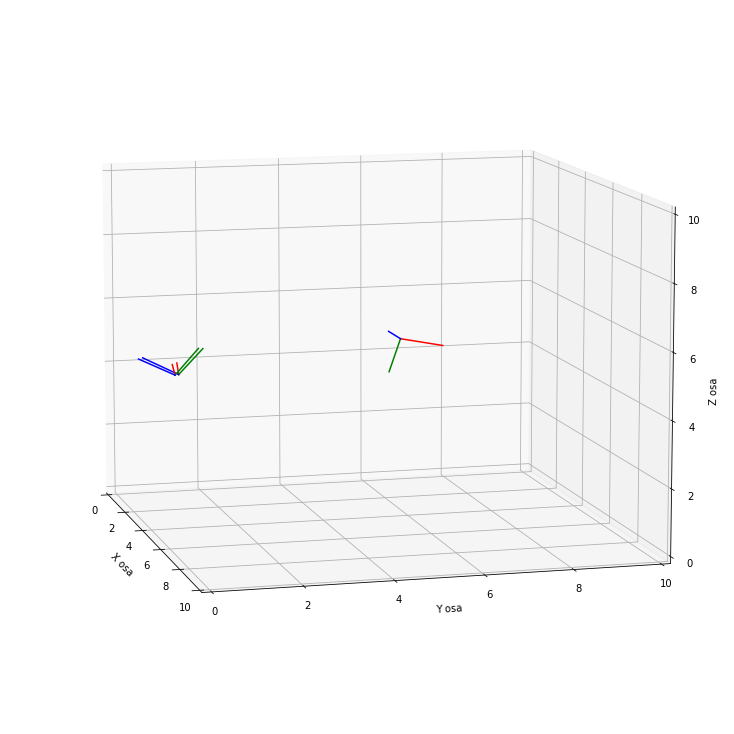

In [22]:
if __name__ == '__main__':
    
    tm = 60
    
    # Pocetna pozicija
    p_s = np.array([7, 5, 6])
    # Rotacija
    A_s = Euler2A(math.pi / 3, math.pi / 2, -math.pi / 4)
    # Pocetni kvaternion
    u, angle = AxisAngle(A_s)
    q_s = AxisAngle2Q(u, angle)
    
    # Krajnja pozicija
    p_e = np.array([2, 1, 4])
    # Rotacija
    A_e = Euler2A(- math.pi / 3, math.pi / 6, -math.pi / 9)
    # Krajnji kvaternion
    u, angle = AxisAngle(A_e)
    q_e = AxisAngle2Q(u, angle) 
    
    # Namestanje da bude 3D
    fig = plt.figure(figsize = (10, 10))
    ax = Axes3D.Axes3D(fig)
    
    # Postavljanje granica osa
    ax.set_xlim3d([0.0, 10.0])
    ax.set_xlabel('X osa')

    ax.set_ylim3d([0.0, 10.0])
    ax.set_ylabel('Y osa')

    ax.set_zlim3d([0.0, 10.0])
    ax.set_zlabel('Z osa')
    
    colors = ['r-', 'g-', 'b-']

    r = transform(p_s, q_s)
    axis_from = [ax.plot(r[i][0], r[i][1], r[i][2], colors[i])[0] for i in range(3)]

    axis_current = [ax.plot(r[i][0], r[i][1], r[i][2], colors[i])[0] for i in range(3)]

    r = transform(p_e, q_e)
    axis_to = [ax.plot(r[i][0], r[i][1], r[i][2], colors[i])[0] for i in range(3)]

    ax.view_init(elev=10, azim=-15)
    
    def animate(frame):
        p = lerp(p_s, p_e, tm, frame)
        q = slerp(q_s, q_e, tm, frame)
        r = transform(p, q)
        for i in range(len(axis_current)):
            axis_current[i].set_data(r[i][0], r[i][1])
            axis_current[i].set_3d_properties(r[i][2])

        fig.canvas.draw()
    # interval - "kasnjenje" izmedju frame-ova
    # repeat-delay - "kasnjenje" izmedju uzastopnog pokretanja fje animate
    anim = animation.FuncAnimation(fig, animate, frames=tm, interval=20, repeat=True, repeat_delay=200)
    
    anim.save('animation.gif', fps = 20)
    
    plt.show()